# Data overview

### Sentinel 2
The Sentinel-2 data is shaped (12, 28, 28, 12). This can be interpreted as follows:
- The 12 items in the first index specify the month of year. We create analysis-ready data for each month of the calendar year
- Each image is 28 x 28 pixels. The images are larger than the WorldView images in order to enable aligment at the borders. `s2[:, 7:-7, 7:-7, :]` should "align" with the WorldView data
- The 12 items in the last index correspond to spectral bands etc, as follows: [BLUE, GREEN, RED, NIR, B5, B6, B7, B8A, B11, B12, Slope (calculated from DEM), and image calendar date)

The Sentinel-2 data should be divided by 65535 to make it in the 0-1 range.


### Sentinel 1
The Sentinel-1 data is shaped as (12, 28, 28, 2), with the last index corresponding to the VV and the VH, respectively. 

### WorldView

The WorldView data is (256, 256), with 3 bands (R, G, B) -- I have not confirmed which band corresponds to R, G, B respectively, but i'm sure that can be easily identified from plotting the data or looking at correlations. The worldview data should be divied by 255 to make it in the 0-1 range.

### Other

You may notice that there are more WorldView data than Sentinel 2 data. I have gone through and only download Sentinel-2 data where the Maxar image (and corresponding height prediction) are correct (e.g. no clouds in the Maxar image, and the model that Meta trained is correct based on photointerpretation).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hickle as hkl
import rasterio as rs

In [2]:
dfpath = "../../data/train-csv/chm/chm-master-clean.csv"
s2_path = "../../data/train-s2/"
worldview_path = '../../data/chm-preds/')

df = pd.read_csv(dfpath)
df.head(5)

,plotid,lat,lon,gedi_rh95,filename,tp,fp,fn,subregion,label,tile_acq_date,mislabel,sentinel_pred
0,3217050010,-20.561510,-58.724957,4.27,image_tile10300100969D1F00_gedi321705001000692...,65536,0,0,South America,100.0,8/20/19,No,9.947348
1,6354050041,-15.939580,-64.630220,3.74,image_tile104001004C55B000_gedi635405004003926...,55841,0,9695,South America,100.0,5/25/19,No,93.757354
2,9640050010,-12.082275,-58.808193,4.98,image_tile104001004D91E600_gedi964005001000907...,56625,0,8911,South America,100.0,7/1/19,No,97.185300
3,14862080040,-4.562866,-38.105984,4.75,image_tile1030010082CCBB00_gedi148620800400269...,51906,0,13630,South America,100.0,6/24/18,No,7.561646
4,3189050020,17.933120,-89.803330,3.44,image_tile103001008E3F8000_gedi318905002000438...,65536,0,0,Central America,100.0,3/14/19,No,97.905663


In [48]:
idx = 36

In [49]:
fpath = f"{sentinel2_path}{df.plotid[idx]}.hkl"
s2 = hkl.load(f"{sentinel2_path}{df.plotid[idx]}.hkl")
fig = plt.figure(figsize=(9, 7))
s2 = s2[2, 7:-7, 7:-7, 0] / 65535
# To read the different maxar bands, you need to do .read(1), .read(2), or .read(3)
maxar = rs.open(f"{maxar_path}{df.filename[idx]}").read(1).astype(np.float32) / 255

<Figure size 648x504 with 0 Axes>

## Plot Sentinel 2 and Maxar data

<AxesSubplot:>

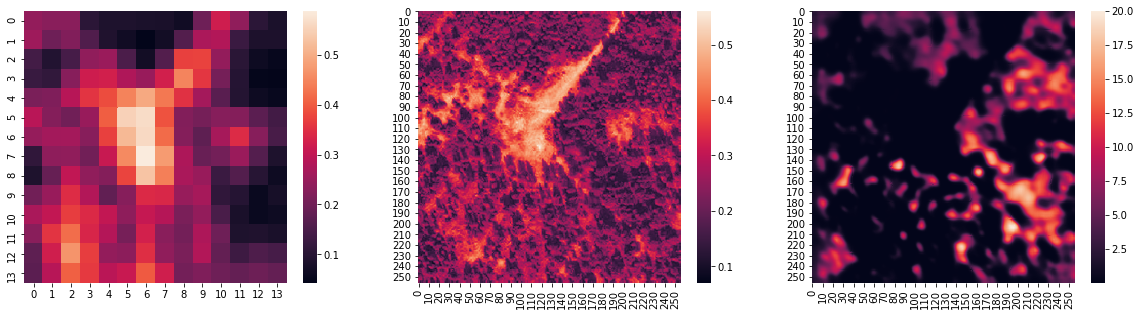

In [50]:
height = rs.open(f"{maxar_path}{df.filename[idx][:-4]}_pred_val.tif").read(1).astype(np.float32)
f, axes = plt.subplots(1, 3, figsize = (20, 5))
sns.heatmap(s2, ax = axes[0])
sns.heatmap(maxar, ax = axes[1])
sns.heatmap(height, ax = axes[2])